*Assignment* 03: DL - LP5 <br>
Use MNIST Fashion Dataset and create a classifier to classify fashion clothing
into categories.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


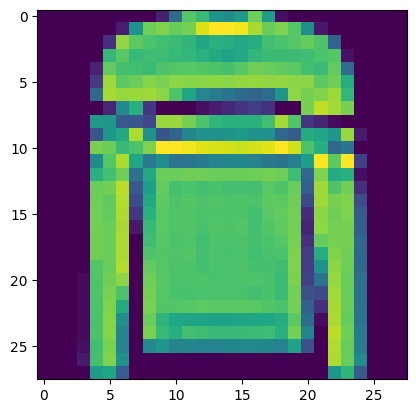

In [10]:
plt.imshow(x_train[5])

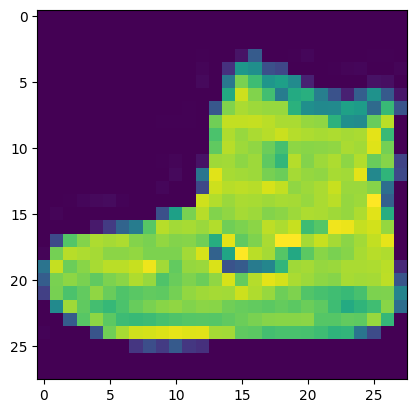

In [3]:
plt.imshow(x_train[0])

In [4]:
# grey scale converting
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [5]:
# reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [6]:
# CNN
model = keras.Sequential([keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Dropout(0.25),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Dropout(0.25),
                          keras.layers.Conv2D(128, (3,3), activation='relu'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.25),
                          keras.layers.Dense(10, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.5561 - accuracy: 0.7931 - val_loss: 0.3844 - val_accuracy: 0.8612
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3658 - accuracy: 0.8666 - val_loss: 0.3202 - val_accuracy: 0.8854
Epoch 3/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3204 - accuracy: 0.8823 - val_loss: 0.2959 - val_accuracy: 0.8914
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2964 - accuracy: 0.8920 - val_loss: 0.2683 - val_accuracy: 0.9021
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2773 - accuracy: 0.8971 - val_loss: 0.2744 - val_accuracy: 0.8957
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2634 - accuracy: 0.9018 - val_loss: 0.2636 - val_accuracy: 0.9025
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2493 - accuracy: 0.9067 - val_loss: 0.2659 -

In [9]:
model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 3s 8ms/step


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.2534 - accuracy: 0.9090
Test accuracy 0.9089999794960022


1/1 [==============================] - 0s 87ms/step
Predicted item: Ankle boot


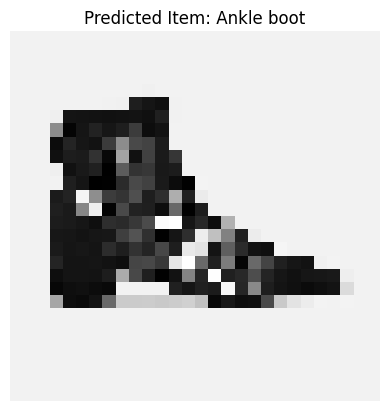

In [19]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

# Define class names dictionary
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Ankle boot",
    9: "Bag"
}

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel datas
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('boot.jpg')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    predicted_class = result[0]
    predicted_item = class_names[predicted_class]
    print("Predicted item:", predicted_item)

    # Display the image
    plt.imshow(load_img('boot.jpg', grayscale=True, target_size=(28, 28)), cmap='gray')
    plt.title(f"Predicted Item: {predicted_item}")
    plt.axis('off')
    plt.show()

run_example()
